<a href="https://colab.research.google.com/github/Shahrzad-Mahboubi/Beale-Function-optimization/blob/main/BealeFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beale function 2D contour plot  

・Beale function  

${f(x,y)=(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2}$  

・Search domain and Global minimum  
${-4.5 \leqq x , y \leqq 4.5}$  

$f_{min}(3,0.5)=0$    

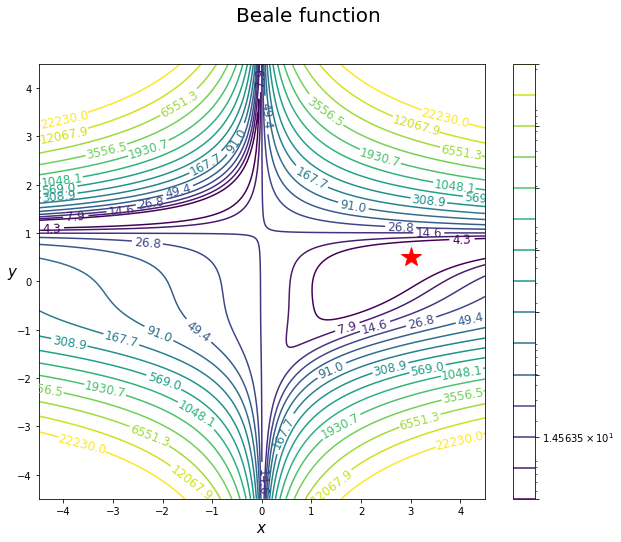

In [45]:
# import the library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation



#Benchmark function
def benchmark(x, y):
    # Rosenbrock function
    #y = 100.0 * (y - x**2)**2 + (x - 1.0)**2
    
    # Himmelblau function
    #y = (x**2 + y - 11.0)**2 + (x + y**2 - 7.0)**2
    
    # Beale function
    y = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2
    
    return y

# Make X-axis and Y-axis
x_vals = np.linspace(-4.5, 4.5, num=350)
y_vals = np.linspace(-4.5, 4.5, num=350)

# Create grid points
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

#Culculate benchmark
z_grid = benchmark(x_grid, y_grid)

# Set the maximum of Z-axis
z_max = 900

# Mask out of display range
z_mask_grid = np.ma.masked_where(z_grid >= z_max, z_grid)

# 対数をとった最小値・最大値を取得
z_log10_min = np.floor(np.log10(z_grid.min()) - 1.0)
z_log10_max = np.ceil(np.log10(z_grid.max()) + 1.0)

# Get the logarithmic minimum/maximum value
lev_log10 = np.linspace(z_log10_min, z_log10_max, num=50)[25:40]
levs = np.power(10, lev_log10)

# Create Contour Plot of Benchmark Function
plt.figure(figsize=(10, 8), facecolor='white')
cnt = plt.contour(x_grid, y_grid, z_grid, 
                  norm=LogNorm(), levels=levs) # Contour Plot
plt.clabel(cnt, fontsize=12, fmt="%.1f")
plt.plot(3.0, 0.5, 'r*', markersize=20)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15, rotation = 0)
plt.suptitle('Beale function', fontsize=20)
plt.colorbar(cnt)
#plt.grid()
#plt.axis('equal')
plt.savefig("Beale_Function2D.png")
plt.show()

Beale function 3D images

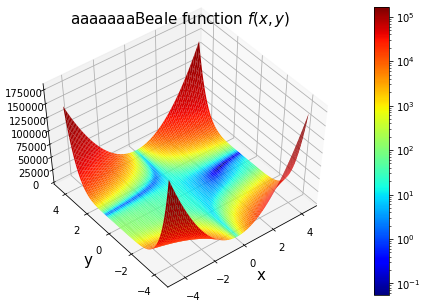

In [61]:
from numpy.core.multiarray import min_scalar_type
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Make X-axis and Y-axis
x_vals =  np.arange(-4.5, 4.5, 0.1)
y_vals = np.arange(-4.5,4.5, 0.1)

# Create grid points
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

#Culculate benchmark
z_grid = benchmark(x_grid, y_grid)

# Create 3D Contour Plot of Benchmark Function
fig = plt.figure()
ax = Axes3D(fig, azim = -128, elev = 52)
cnt = ax.plot_surface(x_grid, y_grid, z_grid, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)
plt.colorbar(cnt)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title("Beale function", fontsize=15)

plt.savefig("Beale_Function3D.png")

plt.show()